# AI for Cyber Security
Understanding unsupervised machine learning

## Unsupervised Learning
Focuses on finding patterns and insights within unlabeled datasets (datasets without a predefined target variable).

the main goal is to uncover hidden structure, group similar data points, or reduce complexity by representing data in new ways.

## Clustering
Group data points into clusters based on similarity.

types:
*   K-Means
*   Hierarchical Clustering

## Dimensionality Reduction
Reduce the number of features while preserving important information.

types:

*   Principal Component Analysis (PCA)
*   t-Distributed Stochastic Neighbor Embedding (t-SNE)

for further reading

Link: https://www.ibm.com/topics/unsupervised-learning

## Lookig at k-means clustering example


## K-means Clustering

K-means is an unsupervised learning algorithm that aims to group unlabeled data points into 'K' clusters based on their similarity.

How it works:

1. Choose a number of clusters (K).
2. Randomly place K centroids (cluster centers) in the data space.
3. Assign each data point to the nearest centroid.
4. Update centroids by calculating the mean of the points in each cluster.
5. Repeat steps 3-4 until convergence (centroids no longer move significantly).

In [1]:
# importing required liberaries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target_names[iris.target]

In [3]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-6-8423e9ad0ba9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


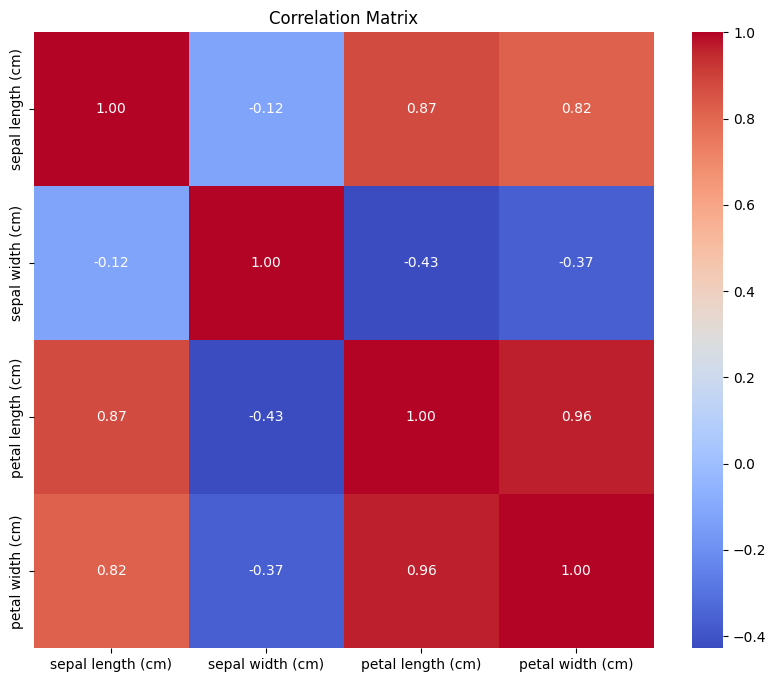

In [6]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Data pre processing

In [7]:
# droppig the headings and obtaining only the numericala data
data = data.drop('target', axis=1)

In [8]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Convert the data to a TensorFlow constant
data_tensor = tf.constant(data_scaled, dtype=tf.float32)

## Model creation

In [10]:
# Define the number of clusters
num_clusters = 3

In [11]:
# Initialize centroids randomly
initial_centroids = tf.Variable(tf.slice(tf.random.shuffle(data_tensor), [0, 0], [num_clusters, -1]))

In [12]:
# K-means algorithm
def k_means(data, centroids):
    expanded_data = tf.expand_dims(data, 0)
    expanded_centroids = tf.expand_dims(centroids, 1)

    # Calculate distances between each data point and each centroid
    distances = tf.reduce_sum(tf.square(tf.subtract(expanded_data, expanded_centroids)), 2)

    # Find the cluster assignments
    assignments = tf.argmin(distances, 0)

    # Update centroids based on the mean of data points in each cluster
    new_centroids = []
    for c in range(num_clusters):
        points_in_cluster = tf.gather(data, tf.where(tf.equal(assignments, c)))
        new_centroids.append(tf.reduce_mean(points_in_cluster, axis=0))

    return assignments, tf.stack(new_centroids)

## Training the model

In [13]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    assignments, new_centroids = k_means(data_tensor, initial_centroids)

    # Update centroids
    initial_centroids.assign(tf.squeeze(new_centroids, axis=1))

In [15]:
# Convert TensorFlow tensors to NumPy arrays for plotting
data_np = data_tensor.numpy()
centroids_np = initial_centroids.numpy()
assignments_np = assignments.numpy()

## Silhouette Score

The silhouette score is a metric used to evaluate the quality of clustering results. For each data point, it provides a measure of how similar it is to its own cluster (cohesion) compared to other clusters (separation).

1. Range: -1 to +1
2. Interpretation:
Higher values indicate better clustering; scores near 0 suggest overlapping clusters.

documnetation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [16]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_np, assignments.numpy())
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4630420506000519


## Visual inspection of model performance

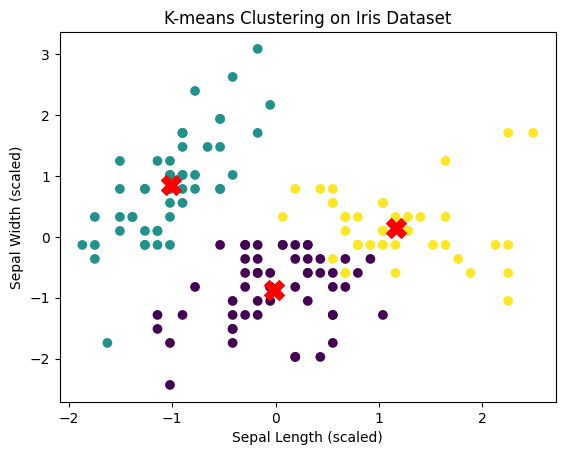

In [17]:
# Plot the data points and centroids
plt.scatter(data_np[:, 0], data_np[:, 1], c=assignments_np, cmap='viridis')
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], marker='X', s=200, c='red')
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()
